# IDENTIFY OPTIMAL NEIGHBORHOOD FOR SETTING UP SMALL BUSINESS USING CLUSTER ANALYSIS

## BUSINESS PROBLEM/OBJECTIVE

The primary objective of this project is to identify the optimal neighborhood in Manhattan area to start a small Grocery store business. The insights will be useful for people who would like to start their own business or a franchise. The detailed analysis of neighborhood would enable the stakeholders with all the necessary informations to make informed decisions. 

The following are the considerations and the reasons for choosing the preferred location and type of small business for this study:
- **Manhattan**: The primary location choice of the stakeholder to set up his new business is **Manhattan**. It's probably the most famous and vibrant Borough of New York city. Labor availability (skills at all levels) and closer to consumer population are few of the reasons which makes it an ideal location. Aside from being known as financial capital of the world, it also offers multicultural cuisines, excellent subway system, and other amenities. Because of these factors, there will be no shortage of activities which makes an ideal spot to set up/expand a small business. There is a good chance of gaining customer traction, generate revenue and increase profitability.


- **Groceries** - The stakeholder has prior experience in the grocery store business and has been very successful in running his business in other major cities.  The stakeholder is looking for an optimal location/neighborhood in Manhattan area to set up his grocery business.The new location would help to increase brand awareness and build customer loyalty. The stakeholder already has a business relationships with few of the big restaurant franchise in other locations which provides him an edge over others in the Manhattan area. The primary intention is to be a preferred vendor to other small franchise and restaurants whom he doesn't have relationship with. We are going to select the neighborhood based on the number of restaurants and other eatables to set up this grocery store. It will be easy to ship the raw materials on time if we set up the new business in the optimal location. 

**Approach**: Segmenting neighborhoods using cluster analysis based on location data will be a powerful insights to solve business problem for unlabeled data. For this study, we are going to explore the following methodologies.
- *KMeans*:
- *DBSCAN*:

Based on the results and accuracy, we will finalize the appropriate algorithm and segment the neighborhoods


## DATA SOURCES

Gathering necessary and relevant data for this study is probably the most important for answering business question. For this study, we are going to gather data from 2 different sources which are as follows.

- **External Data**: We are going to leverage external data which already has 5 Boroughs (and one of them is Manhattan) and 306 neighborhoods.  It also has latitude and longitude co-ordinates for each neighborhood. The link to the data set is : https://geo.nyu.edu/catalog/nyu_2451_34572. This data will be later merged with Foursquare location data


- **Foursquare Data**: We are also going to leverage Foursquare API (using the unique credentials) to retrieve various neighborhoods information in and around Manhattan area. We will gather data such as venue, venue category, venue summary, distance etc....Foursquare is very powerful source of medium to answer our business question. There are various other data sources (such as trending venues, tips etc>>) within Foursquare which was not part of this study.

Sample data for Foursquare is shown below

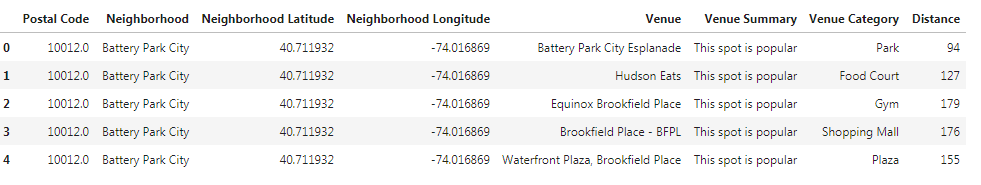

In [1]:
from IPython.display import Image
Image (filename='C:/Users/sudha27/Desktop/sample_data.png')

## METHODOLOGIES

Our objective is to segment neighborhoods based on location co-ordinates. 

**DATA WRANGLING/FEATURE ENGINEEERING** - The raw data that was retrieved from Foursquare was cleaned to meet our requirements. At each step, we ensured the result was as intended. Once we gathered, all the data, we performed one hot encoding on venue category to convert categorical features into a numerical values so that machine learning algorithms can be applied

**MACHINE LEARNING ALGORITHMS** - As we have unlabeled data, Machine Learning techniques using **CLUSTERING ANALYSIS** using **Partition method** makes it an ideal algorithm to solve our business problem. We explored different techniques but narrowed down to Kmeans algorithm to segment neighborhoods. 

 - **KMeans** - The k-means method partitions the data objects into k clusters such that all points in same clusters are closer to the center point. It is easy to understand and implement and takes less time to execute compared to other techniques, also it can handle large datasets as well.

- **Determination of appropriate clusters** - One of the KMeans requirement is to choose the number of clusters prior hand. In order to achieve this, we used elbow method and Silhoutte score to determine the appropriate of clusters for our problem. Bothe the methods recommended cluster 6 solution was implemented for this data.

## RESULTS

### Top Neighborhoods to set up small business based on cluster segmentation

### Best Neighborhoods
- **East Village** with latitude= 40.727847 and longitude= -73.982226
- **Gramercy** with latitude= 40.737210 longitude= -73.981376
- **Noho** with latitude= 40.723259 longitude= -73.988434

### Second Best Neighborhoods
- **Central Harlem** with latitude= 40.815976 and longitude= -73.943211
- **Murray Hill** with latitude= 40.748303 and longitude= -73.978332
- **Tudor city** with latitude= 40.746917 and longitude= -73.971219
- **Turtle Bay** with latitude= 40.752042 and longitude= -73.967708

## DISCUSSION

Algorithm recommended 3 best neighborhoods which offer similar characteristics. Either of these neighborhoods would meet and satisfy stakeholders requirements. Now that the neighborhoods has been narrowed down from 40 to 3, the stakeholder should gather additional information about each neighborhood before finalizing a specific venue. 

## CONCLUSION & LIMITATIONS

Although this study provided insights and recommendations on the optimal neighborhood, there are some limitations to the study. One of the major limitations is the lack of more rich & relevant data set. Access to data such as **price index**, **census data**, **labor data**, **crime data**, **school ratings** etc would have provided much more strong evidence on the optimal neighborhood 

# STARTING OF CODE

### IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from bs4 import BeautifulSoup 
import requests
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import pylab
import scipy.cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

# STEP 1: GATHER REQUIRED DATA

- **External Data** - The link to the data set is : https://geo.nyu.edu/catalog/nyu_2451_34572.
- **Foursquare Data** -  We are also going to leverage Foursquare API (using the unique credentials) to retrieve various neighborhoods information in and around Manhattan area. We will gather data such as venue, venue category, venue summary, distance etc

In [10]:
New_York_Data=pd.read_csv("C:/Users/sudha27/Desktop/certification/neighborhoods.csv")

In [11]:
# Checking the total number of unique Boroughs
New_York_Data.Borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype=object)

In [12]:
# Select only MANHATTAN Borough
Manhattan_data = New_York_Data[New_York_Data['Borough'] == 'Manhattan']
Manhattan_data = Manhattan_data.reset_index(drop=True)
Manhattan_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,10012.0,Manhattan,Battery Park City,40.711932,-74.016869
1,10012.0,Manhattan,Carnegie Hill,40.782683,-73.953256
2,10013.0,Manhattan,Central Harlem,40.815976,-73.943211
3,10014.0,Manhattan,Chelsea,40.744035,-74.003116
4,10004.0,Manhattan,Chinatown,40.715618,-73.994279


### Leverage Foursquare API endpoint to get the required information 

In [13]:
def foursquare_crawler (postal_code_list, neighborhood_list, lat_list, lng_list, LIMIT = 500, radius = 1000):
    result_ds = []
    counter = 0
    for postal_code, neighborhood, lat, lng in zip(postal_code_list, neighborhood_list, lat_list, lng_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Postal Code'] = postal_code; tmp_dict['Neighborhood(s)'] = neighborhood; 
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        counter += 1
        print('{}.'.format(counter))
        print('Data is Obtained, for the Postal Code {} (and Neighborhoods {}) SUCCESSFULLY.'.format(postal_code, neighborhood))
    return result_ds;

### Use unique credentials and connect with Foursquare API

In [14]:
CLIENT_ID = '02XI22LSV2ONB4TDCQKNMUXPECHUXN0BHAFDKXUFRLPQSY1Q' # your Foursquare ID
CLIENT_SECRET = 'KZFNH24O4EIKJIN35YNZW5CXKMBSCLGIPI2KXQXF2Y2TEQGG' # your Foursquare Secret
VERSION = '20180604'

#### There are 40 unique neighborhoods in Manhattan area

In [15]:
Manhattan_foursquare_dataset = foursquare_crawler(list(Manhattan_data['Postal Code']),
                                                   list(Manhattan_data['Neighborhood']),
                                                   list(Manhattan_data['Latitude']),
                                                   list(Manhattan_data['Longitude']),)

1.
Data is Obtained, for the Postal Code 10012.0 (and Neighborhoods Battery Park City) SUCCESSFULLY.
2.
Data is Obtained, for the Postal Code 10012.0 (and Neighborhoods Carnegie Hill) SUCCESSFULLY.
3.
Data is Obtained, for the Postal Code 10013.0 (and Neighborhoods Central Harlem) SUCCESSFULLY.
4.
Data is Obtained, for the Postal Code 10014.0 (and Neighborhoods Chelsea) SUCCESSFULLY.
5.
Data is Obtained, for the Postal Code 10004.0 (and Neighborhoods Chinatown) SUCCESSFULLY.
6.
Data is Obtained, for the Postal Code 10005.0 (and Neighborhoods Civic Center) SUCCESSFULLY.
7.
Data is Obtained, for the Postal Code 10005.0 (and Neighborhoods Clinton) SUCCESSFULLY.
8.
Data is Obtained, for the Postal Code 10012.0 (and Neighborhoods East Harlem) SUCCESSFULLY.
9.
Data is Obtained, for the Postal Code 10012.0 (and Neighborhoods East Village) SUCCESSFULLY.
10.
Data is Obtained, for the Postal Code 10013.0 (and Neighborhoods Financial District) SUCCESSFULLY.
11.
Data is Obtained, for the Postal Co

## STEP 2: DATA WRANGLING

In [16]:
def get_venue_dataset(foursquare_dataset):
    result_df = pd.DataFrame(columns = ['Postal Code', 'Neighborhood', 
                                           'Neighborhood Latitude', 'Neighborhood Longitude',
                                          'Venue', 'Venue Summary', 'Venue Category', 'Distance'])
    # print(result_df)
    
    for neigh_dict in foursquare_dataset:
        postal_code = neigh_dict['Postal Code']; neigh = neigh_dict['Neighborhood(s)']
        lat = neigh_dict['Latitude']; lng = neigh_dict['Longitude']
        print('Number of Venuse in Coordination "{}" Posal Code and "{}" Negihborhood(s) is:'.format(postal_code, neigh))
        print(len(neigh_dict['Crawling_result']))
        
        for venue_dict in neigh_dict['Crawling_result']:
            summary = venue_dict['reasons']['items'][0]['summary']
            name = venue_dict['venue']['name']
            dist = venue_dict['venue']['location']['distance']
            cat =  venue_dict['venue']['categories'][0]['name']
            
            
            # print({'Postal Code': postal_code, 'Neighborhood': neigh, 
            #                   'Neighborhood Latitude': lat, 'Neighborhood Longitude':lng,
            #                   'Venue': name, 'Venue Summary': summary, 
            #                   'Venue Category': cat, 'Distance': dist})
            
            result_df = result_df.append({'Postal Code': postal_code, 'Neighborhood': neigh, 
                              'Neighborhood Latitude': lat, 'Neighborhood Longitude':lng,
                              'Venue': name, 'Venue Summary': summary, 
                              'Venue Category': cat, 'Distance': dist}, ignore_index = True)
            # print(result_df)
    
    return(result_df)

### The maximum number of venues we can gather from each neighborhood is limited to 100 set by Foursquare, which is the reason why we are getting the maximum venues as 100 

In [17]:
Manhattan_venues = get_venue_dataset(Manhattan_foursquare_dataset)

Number of Venuse in Coordination "10012.0" Posal Code and "Battery Park City" Negihborhood(s) is:
100
Number of Venuse in Coordination "10012.0" Posal Code and "Carnegie Hill" Negihborhood(s) is:
100
Number of Venuse in Coordination "10013.0" Posal Code and "Central Harlem" Negihborhood(s) is:
100
Number of Venuse in Coordination "10014.0" Posal Code and "Chelsea" Negihborhood(s) is:
100
Number of Venuse in Coordination "10004.0" Posal Code and "Chinatown" Negihborhood(s) is:
100
Number of Venuse in Coordination "10005.0" Posal Code and "Civic Center" Negihborhood(s) is:
100
Number of Venuse in Coordination "10005.0" Posal Code and "Clinton" Negihborhood(s) is:
100
Number of Venuse in Coordination "10012.0" Posal Code and "East Harlem" Negihborhood(s) is:
100
Number of Venuse in Coordination "10012.0" Posal Code and "East Village" Negihborhood(s) is:
100
Number of Venuse in Coordination "10013.0" Posal Code and "Financial District" Negihborhood(s) is:
100
Number of Venuse in Coordinati

#### Checking the number of unique neighborhood again

In [41]:
unique_list = list(Manhattan_venues['Neighborhood'].unique())
print(len(unique_list))
unique_list

40


['Battery Park City',
 'Carnegie Hill',
 'Central Harlem',
 'Chelsea',
 'Chinatown',
 'Civic Center',
 'Clinton',
 'East Harlem',
 'East Village',
 'Financial District',
 'Flatiron',
 'Gramercy',
 'Greenwich Village',
 'Hamilton Heights',
 'Hudson Yards',
 'Inwood',
 'Lenox Hill',
 'Lincoln Square',
 'Little Italy',
 'Lower East Side',
 'Manhattan Valley',
 'Manhattanville',
 'Marble Hill',
 'Midtown',
 'Midtown South',
 'Morningside Heights',
 'Murray Hill',
 'Noho',
 'Roosevelt Island',
 'Soho',
 'Stuyvesant Town',
 'Sutton Place',
 'Tribeca',
 'Tudor City',
 'Turtle Bay',
 'Upper East Side',
 'Upper West Side',
 'Washington Heights',
 'West Village',
 'Yorkville']

In [42]:
neigh_venue_summary = Manhattan_venues.groupby('Neighborhood').count()

In [43]:
neigh_venue_summary.shape

(40, 7)

In [44]:
neigh_venue_summary.head()

,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Summary,Venue Category,Distance
Neighborhood,,,,,,,
Battery Park City,100,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100,100
Chelsea,100,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100,100


#### Below is the list of all unique venues we retrieved from foursquare for our data

In [45]:
print('There are {} uniques categories.'.format(len(Manhattan_venues['Venue Category'].unique())))

print('Here is the list of different categories:')
list(Manhattan_venues['Venue Category'].unique())

There are 310 uniques categories.
Here is the list of different categories:


['Park',
 'Food Court',
 'Gym',
 'Shopping Mall',
 'Plaza',
 'Market',
 'Performing Arts Venue',
 'Smoke Shop',
 'Memorial Site',
 'BBQ Joint',
 'Coffee Shop',
 'Fountain',
 'Scenic Lookout',
 'Building',
 'Sandwich Place',
 'Cupcake Shop',
 'Burrito Place',
 'Food Truck',
 'Movie Theater',
 'Auditorium',
 'Monument / Landmark',
 'Italian Restaurant',
 'Ice Cream Shop',
 'Hotel',
 'Burger Joint',
 'Tree',
 'Electronics Store',
 'Mexican Restaurant',
 'Pizza Place',
 'Lingerie Store',
 'Athletics & Sports',
 'Pub',
 'Wine Shop',
 'Cosmetics Shop',
 'Dog Run',
 'Grocery Store',
 'Public Art',
 'Vegetarian / Vegan Restaurant',
 'Cycle Studio',
 'Jewelry Store',
 'Museum',
 'Pet Store',
 'Japanese Restaurant',
 "Women's Store",
 'Gym / Fitness Center',
 'Café',
 'Bookstore',
 'Strip Club',
 'Furniture / Home Store',
 'Steakhouse',
 'Bakery',
 'Kids Store',
 'Department Store',
 'Wine Bar',
 'Playground',
 'Juice Bar',
 'Sporting Goods Shop',
 'Boxing Gym',
 'Bagel Shop',
 'Korean Restauran

#### Feature Engineering - Use one hot encoding to convert categorial to numerical values so that we can apply machine learning techniques

In [46]:
Manhattan_onehot = pd.get_dummies(data = Manhattan_venues, drop_first  = False, 
                              prefix = "", prefix_sep = "", columns = ['Venue Category'])
Manhattan_onehot.head()

,Postal Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Summary,Distance,Accessories Store,Adult Boutique,African Restaurant,...,Video Game Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,10012.0,Battery Park City,40.711932,-74.016869,Battery Park City Esplanade,This spot is popular,94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10012.0,Battery Park City,40.711932,-74.016869,Hudson Eats,This spot is popular,127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10012.0,Battery Park City,40.711932,-74.016869,Equinox Brookfield Place,This spot is popular,179,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10012.0,Battery Park City,40.711932,-74.016869,Brookfield Place - BFPL,This spot is popular,176,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10012.0,Battery Park City,40.711932,-74.016869,"Waterfront Plaza, Brookfield Place",This spot is popular,155,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Manhattan_onehot.columns.unique()

Index(['Postal Code', 'Neighborhood', 'Neighborhood Latitude',
       'Neighborhood Longitude', 'Venue', 'Venue Summary', 'Distance',
       'Accessories Store', 'Adult Boutique', 'African Restaurant',
       ...
       'Video Game Store', 'Vietnamese Restaurant', 'Volleyball Court',
       'Waterfront', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint',
       'Women's Store', 'Yoga Studio'],
      dtype='object', length=318)

#### Get the list of all unique venues. This will help to choose only the restaurants and other eatables since our intention is to set up grocery store

In [20]:
list(Manhattan_onehot)

['Postal Code',
 'Neighborhood',
 'Neighborhood Latitude',
 'Neighborhood Longitude',
 'Venue',
 'Venue Summary',
 'Distance',
 'Accessories Store',
 'Adult Boutique',
 'African Restaurant',
 'American Restaurant',
 'Animal Shelter',
 'Antique Shop',
 'Arcade',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auditorium',
 'Australian Restaurant',
 'Austrian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Bookstore',
 'Boutique',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cambodian Restaurant',
 'Camera Store',
 'Campground

#### Choose only the restaurants

In [49]:
important_list_of_features = [
 
 'Neighborhood',
 'Neighborhood Latitude',
 'Neighborhood Longitude',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Brazilian Restaurant',
 'Breakfast Spot',
  'Bubble Tea Shop',
 'Buffet',
'Burrito Place',
'Cafeteria',
 'Café',
 'Cambodian Restaurant',
'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Christmas Market',
'Cocktail Bar',
 'Coffee Shop',
 'College Cafeteria',
'Comfort Food Restaurant',
'Convenience Store',
'Cuban Restaurant',
 'Cupcake Shop',
'Czech Restaurant',
'Deli / Bodega',
'Dessert Shop',
'Donut Shop',
 'Drugstore',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
  'Farmers Market',
 'Fast Food Restaurant',
  'Filipino Restaurant',
 'Fish Market',
   'Food & Drink Shop',
 'Food Court',
 'Food Truck',
  'French Restaurant',
 'Fried Chicken Joint',
 'Frozen Yogurt Shop',
'Gaming Cafe',
'German Restaurant',
'Greek Restaurant',
 'Grocery Store',
'Halal Restaurant',
  'Hawaiian Restaurant',
  'Hotel Bar',
'Ice Cream Shop',
 'Indian Restaurant',
 'Indie Movie Theater',
 'Indie Theater',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
  'Jewish Restaurant',
 'Juice Bar',
 
 'Korean Restaurant',
 'Kosher Restaurant',
 
 'Latin American Restaurant',
 
 'Lebanese Restaurant',
 
 'Malay Restaurant',
 
 'Mediterranean Restaurant',
 
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 
 
 'Molecular Gastronomy Restaurant',
 
 'Moroccan Restaurant',
 
 'New American Restaurant',
 
 'Noodle House',
 
 'Organic Grocery',
 
 
 'Persian Restaurant',
 'Peruvian Restaurant',
 
 'Pie Shop',
 
 'Pizza Place',
 
 'Ramen Restaurant',
 
 'Restaurant',

 'Russian Restaurant',
 'Sake Bar',
 'Salad Place',
 
 'Sandwich Place',
 
 'Seafood Restaurant',
 'Shabu-Shabu Restaurant',
 'Shanghai Restaurant',
  
 'Snack Place',
 'Soba Restaurant',
 'Social Club',
 'Soup Place',
 'South American Restaurant',
 'Southern / Soul Food Restaurant',

 'Spanish Restaurant',

 

 'Steakhouse',
 
 
 'Supermarket',
 
 'Sushi Restaurant',
 'Swiss Restaurant',
 'Synagogue',
 'Szechuan Restaurant',
 
 'Taco Place',
 'Taiwanese Restaurant',
 'Tapas Restaurant',
 'Tattoo Parlor',
 'Tea Room',
  'Thai Restaurant',
  'Turkish Restaurant',
 'Udon Restaurant',
 'Ukrainian Restaurant',
 
 'Vegetarian / Vegan Restaurant',
 'Venezuelan Restaurant',
 'Veterinarian',
 
 'Vietnamese Restaurant'
 
 
]


#### Recreating feature engineered list based on only restaurants

In [50]:
Manhattan_onehot= Manhattan_onehot[important_list_of_features].groupby(
    'Neighborhood').sum()


Manhattan_onehot.head()

,Neighborhood Latitude,Neighborhood Longitude,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Tattoo Parlor,Tea Room,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,4071.193198,-7401.686931,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
Carnegie Hill,4078.268257,-7395.325647,0,2,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
Central Harlem,4081.597607,-7394.321113,4,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Chelsea,4074.403471,-7400.311633,0,5,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Chinatown,4071.561842,-7399.427936,0,3,0,0,2,1,1,0,...,0,0,2,0,0,0,1,0,0,0


In [51]:
feat_name_list = list(Manhattan_onehot.columns)
restaurant_list = []


for counter, value in enumerate(feat_name_list):
    if value.find('Restaurant') != (-1):
        restaurant_list.append(value)
        
Manhattan_onehot['Total Restaurants'] = Manhattan_onehot[restaurant_list].sum(axis = 1)
Manhattan_onehot 

feat_name_list = list(Manhattan_onehot.columns)
joint_list = []


for counter, value in enumerate(feat_name_list):
    if value.find('Joint') != (-1):
        joint_list.append(value)
        
Manhattan_onehot['Total Joints'] = Manhattan_onehot[joint_list].sum(axis = 1)
Manhattan_onehot

,Neighborhood Latitude,Neighborhood Longitude,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Total Restaurants,Total Joints
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,4071.193198,-7401.686931,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,6,2
Carnegie Hill,4078.268257,-7395.325647,0,2,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,22,0
Central Harlem,4081.597607,-7394.321113,4,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,37,2
Chelsea,4074.403471,-7400.311633,0,5,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,25,0
Chinatown,4071.561842,-7399.427936,0,3,0,0,2,1,1,0,...,2,0,0,0,1,0,0,0,33,0
Civic Center,4071.522892,-7400.541530,0,3,0,0,2,1,0,0,...,0,0,0,0,1,0,0,0,25,0
Clinton,4075.910089,-7399.611936,0,5,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,23,0
East Harlem,4079.224947,-7394.418223,0,2,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,31,1
East Village,4072.784678,-7398.222617,0,1,1,1,2,0,0,0,...,1,0,1,1,2,0,0,1,35,1


In [52]:
Manhattan_a=Manhattan_onehot.drop(['Neighborhood Latitude','Neighborhood Longitude'], axis=1)
Manhattan_a.head()

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Total Restaurants,Total Joints
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,0,0,0,0,0,0,0,2,1,1,...,0,0,0,0,1,0,0,0,6,2
Carnegie Hill,0,2,0,0,0,0,1,0,1,3,...,1,0,0,0,1,0,0,1,22,0
Central Harlem,4,3,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,37,2
Chelsea,0,5,0,0,2,0,0,0,2,2,...,0,0,0,0,1,0,0,0,25,0
Chinatown,0,3,0,0,2,1,1,0,0,1,...,2,0,0,0,1,0,0,0,33,0


In [53]:
Manhattan_a = Manhattan_a.groupby('Neighborhood').mean().reset_index()
Manhattan_a


,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,...,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Total Restaurants,Total Joints
0,Battery Park City,0,0,0,0,0,0,0,2,1,...,0,0,0,0,1,0,0,0,6,2
1,Carnegie Hill,0,2,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,22,0
2,Central Harlem,4,3,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,37,2
3,Chelsea,0,5,0,0,2,0,0,0,2,...,0,0,0,0,1,0,0,0,25,0
4,Chinatown,0,3,0,0,2,1,1,0,0,...,2,0,0,0,1,0,0,0,33,0
5,Civic Center,0,3,0,0,2,1,0,0,1,...,0,0,0,0,1,0,0,0,25,0
6,Clinton,0,5,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,23,0
7,East Harlem,0,2,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,31,1
8,East Village,0,1,1,1,2,0,0,0,2,...,1,0,1,1,2,0,0,1,35,1
9,Financial District,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,15,1


#### Top 3 venues in each neighborhood

In [55]:
num_top_venues = 3

for hood in Manhattan_a['Neighborhood']:
    print("----"+hood+"----")
    temp = Manhattan_a[Manhattan_a['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
               venue  freq
0        Coffee Shop   8.0
1  Total Restaurants   6.0
2       Total Joints   2.0


----Carnegie Hill----
               venue  freq
0  Total Restaurants  22.0
1        Coffee Shop   6.0
2        Pizza Place   6.0


----Central Harlem----
                             venue  freq
0                Total Restaurants  37.0
1                             Café   5.0
2  Southern / Soul Food Restaurant   5.0


----Chelsea----
                 venue  freq
0    Total Restaurants  25.0
1  American Restaurant   5.0
2   Seafood Restaurant   4.0


----Chinatown----
                venue  freq
0   Total Restaurants  33.0
1  Chinese Restaurant   7.0
2        Cocktail Bar   5.0


----Civic Center----
               venue  freq
0  Total Restaurants  25.0
1  French Restaurant   6.0
2             Bakery   5.0


----Clinton----
                 venue  freq
0    Total Restaurants  23.0
1  American Restaurant   5.0
2          Coffee Shop   4.0


----East Har

In [56]:
manhattan_grouped_clustering = Manhattan_a.drop('Neighborhood', 1)

#### Correlation Analysis

In [58]:
corr=manhattan_grouped_clustering.corr()
corr

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Total Restaurants,Total Joints
African Restaurant,1.000000e+00,6.117152e-02,-0.055630,-6.512206e-02,-0.167562,-0.097683,-6.512206e-02,2.204856e-01,-2.574130e-17,-0.228988,...,-1.555173e-01,-6.512206e-02,-4.482007e-02,-0.031284,-0.166759,-0.044820,-0.031284,-0.098192,0.204922,0.347785
American Restaurant,6.117152e-02,1.000000e+00,-0.089158,-1.043707e-01,0.109410,0.313112,4.634991e-17,9.637388e-02,-2.043777e-01,0.055301,...,-7.788956e-02,-1.448435e-17,7.975049e-18,-0.150414,0.112078,-0.287331,-0.150414,-0.185984,0.347436,-0.061933
Arepa Restaurant,-5.563001e-02,-8.915787e-02,1.000000,5.378562e-01,0.358797,-0.142374,-9.491580e-02,4.869078e-02,-4.505773e-02,0.019812,...,5.666685e-02,-9.491580e-02,8.056816e-01,0.562352,0.070563,-0.065326,-0.045596,0.377303,0.303797,0.086361
Argentinian Restaurant,-6.512206e-02,-1.043707e-01,0.537856,1.000000e+00,0.349427,-0.166667,1.666667e-01,4.034188e-17,-1.977969e-02,-0.262250,...,6.633581e-02,-1.111111e-01,6.882472e-01,0.480384,0.082604,0.305888,-0.053376,0.441681,0.183250,0.145051
Asian Restaurant,-1.675623e-01,1.094097e-01,0.358797,3.494265e-01,1.000000,0.444725,1.376529e-01,-1.792520e-01,5.277911e-02,-0.164743,...,4.425176e-02,-1.800076e-01,3.862444e-01,0.269592,-0.137322,0.094739,-0.137339,0.207554,0.152242,-0.091735
Australian Restaurant,-9.768308e-02,3.131121e-01,-0.142374,-1.666667e-01,0.444725,1.000000,4.166667e-02,-1.282473e-01,-1.038434e-01,-0.032112,...,-2.487593e-02,-1.666667e-01,-1.147079e-01,-0.080064,-0.013767,-0.114708,-0.080064,-0.251301,0.131536,-0.178017
Austrian Restaurant,-6.512206e-02,4.634991e-17,-0.094916,1.666667e-01,0.137653,0.041667,1.000000e+00,1.293313e-16,-1.186782e-01,0.058872,...,-1.658395e-02,-1.111111e-01,-7.647191e-02,-0.053376,-0.100960,0.305888,-0.053376,0.137073,0.082069,0.013186
BBQ Joint,2.204856e-01,9.637388e-02,0.048691,4.034188e-17,-0.179252,-0.128247,1.293313e-16,1.000000e+00,-1.217612e-01,-0.271808,...,-1.531330e-01,7.356460e-17,1.176878e-01,-0.082144,0.296623,-0.117688,-0.082144,-0.070317,0.039794,0.750861
Bagel Shop,-2.574130e-17,-2.043777e-01,-0.045058,-1.977969e-02,0.052779,-0.103843,-1.186782e-01,-1.217612e-01,1.000000e+00,-0.251527,...,1.594204e-01,7.911878e-02,5.445328e-02,0.228045,-0.058819,-0.081680,-0.152030,0.498874,0.105670,0.131455
Bakery,-2.289878e-01,5.530096e-02,0.019812,-2.622497e-01,-0.164743,-0.032112,5.887237e-02,-2.718080e-01,-2.515271e-01,1.000000,...,1.725453e-01,2.729537e-01,-1.804926e-01,-0.125981,-0.034926,0.040519,0.182543,-0.248698,-0.036445,-0.388089


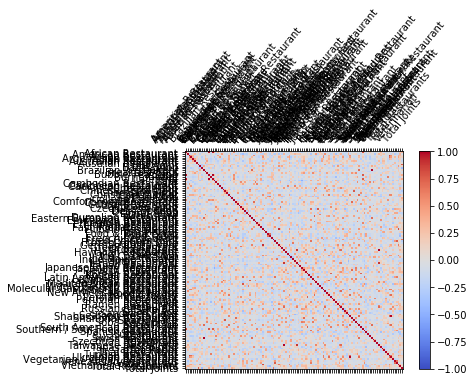

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(manhattan_grouped_clustering.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=50)
ax.set_yticks(ticks)
ax.set_xticklabels(manhattan_grouped_clustering.columns)
ax.set_yticklabels(manhattan_grouped_clustering.columns)
plt.show()

## STEP 3: APPLY MACHINE LEARNING ALGORITHMS

## To execute KMeans algorithm, we need to understand and choose the appropriate number of clusters for this data set

## We are going to use the following method to choose the number of algorithm

- **Elbow Method**
- **Silhouette Score**

In [48]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(manhattan_grouped_clustering)
    kmeanModel.fit(manhattan_grouped_clustering)
    distortions.append(sum(np.min(cdist(manhattan_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / manhattan_grouped_clustering.shape[0])

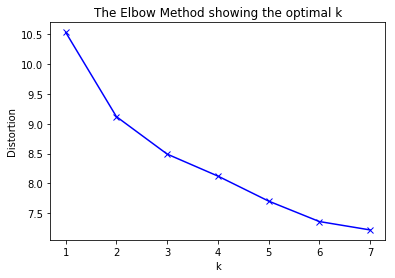

In [49]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

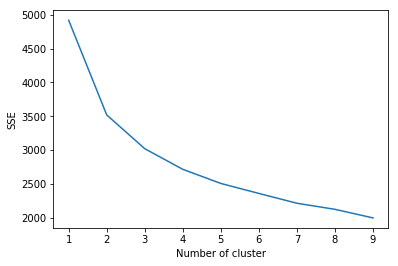

In [50]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(manhattan_grouped_clustering)
    manhattan_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [51]:
# Calculate Silhoutte score
range_n_clusters = list (range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(manhattan_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score (manhattan_grouped_clustering, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.21681630196591706)
For n_clusters = 3, silhouette score is 0.13469868001933374)
For n_clusters = 4, silhouette score is 0.12060956143162486)
For n_clusters = 5, silhouette score is 0.1353091089197526)
For n_clusters = 6, silhouette score is 0.1187056914837152)
For n_clusters = 7, silhouette score is 0.12816837501130957)
For n_clusters = 8, silhouette score is 0.1456665027530771)
For n_clusters = 9, silhouette score is 0.10566196814608331)
For n_clusters = 10, silhouette score is 0.1439108040456968)


## Based on elbow method and silhouette score, the '6 cluster solution is appropriate for our data 

In [52]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
kclusters = 6

#manhattan_grouped_clustering = Manhattan_a.drop('Neighborhood', 1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
kmeans.labels_[0:10] 

array([4, 1, 0, 1, 2, 1, 1, 2, 5, 4])

In [66]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [65]:
means_df = pd.DataFrame(kmeans.cluster_centers_)
means_df.columns = Manhattan_a.columns
means_df.index = ['G1','G2','G3','G4','G5','G6']
means_df['Total Sum'] = means_df.sum(axis = 1)
means_df.sort_values(axis = 0, by = ['Total Sum'], ascending=False)

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Total Restaurants,Total Joints,Total Sum
G6,0.000000,3.333333,6.666667e-01,6.666667e-01,1.666667,3.333333e-01,-1.387779e-17,0.666667,1.000000,0.666667,...,6.666667e-01,3.333333e-01,1.666667,-6.938894e-18,-3.469447e-18,1.000000e+00,40.333333,1.000000,6.666667,117.666667
G1,1.000000,3.250000,0.000000e+00,0.000000e+00,0.250000,5.000000e-01,0.000000e+00,0.250000,1.000000,1.750000,...,0.000000e+00,0.000000e+00,0.750000,0.000000e+00,0.000000e+00,0.000000e+00,35.250000,0.750000,2.000000,100.500000
G3,0.166667,1.666667,1.666667e-01,1.387779e-17,0.500000,1.666667e-01,1.666667e-01,0.000000,0.333333,3.333333,...,6.938894e-18,3.469447e-18,0.166667,1.666667e-01,1.666667e-01,1.666667e-01,31.166667,0.333333,3.500000,96.500000
G4,0.000000,2.363636,1.387779e-17,9.090909e-02,0.545455,2.775558e-17,1.818182e-01,0.272727,1.090909,2.272727,...,6.938894e-18,3.469447e-18,0.727273,9.090909e-02,3.469447e-18,4.545455e-01,31.000000,0.454545,6.000000,95.363636
G2,0.000000,3.200000,1.387779e-17,1.387779e-17,0.900000,4.000000e-01,1.000000e-01,0.200000,0.900000,2.600000,...,6.938894e-18,3.469447e-18,1.000000,6.938894e-18,3.469447e-18,2.000000e-01,25.400000,0.300000,1.800000,79.100000
G5,0.000000,1.500000,0.000000e+00,1.666667e-01,0.333333,2.775558e-17,1.387779e-17,0.333333,0.333333,1.500000,...,6.938894e-18,3.469447e-18,0.666667,6.938894e-18,3.469447e-18,5.551115e-17,15.500000,0.500000,0.666667,57.500000


## STEP 4: Results

In [69]:
results = pd.DataFrame([Manhattan_a.index, 1 + kmeans.labels_]).T
results.columns = ['Neighborhood', 'Group']
results

,Neighborhood,Group
0,0,5
1,1,2
2,2,1
3,3,2
4,4,3
5,5,2
6,6,2
7,7,3
8,8,6
9,9,5


## Top Neighborhoods to set up small business based on cluster segmentation

### Best Neighborhoods
- **East Village** with latitude= 40.727847 and longitude= -73.982226
- **Gramercy** with latitude= 40.737210 longitude= -73.981376
- **Noho** with latitude= 40.723259 longitude= -73.988434

### Second Best Neighborhoods
- **Central Harlem** with latitude= 40.815976 and longitude= -73.943211
- **Murray Hill** with latitude= 40.748303 and longitude= -73.978332
- **Tudor city** with latitude= 40.746917 and longitude= -73.971219
- **Turtle Bay** with latitude= 40.752042 and longitude= -73.967708

## END OF CAPSTONE PROJECT